In [23]:
import pandas as pd
import sklearn
import random
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [18]:
le = preprocessing.LabelEncoder()
random.seed(42)
file_read = pd.read_csv('datafile_new1.csv')

In [19]:
file_read.head()

,Termid,Regd_No,Course,Grade,CA_100,MTT_50,ETT_100,ETP_100,Course_Att,MHRDName,...,CA_3,CA_4,Height,Weight,ScholarType,Direction,Gender,Medium,CourseType,ProgramType
0,418192,4961776,FYZ1785,B+,77,NaN,NaN,61.0,NaN,Integrated Bachelor of Science - Master of Sci...,...,29,37,161,84,Hostler,East,Male,Regional,Theory,UG
1,418192,4961776,FYZ1786,A,89,NaN,68.0,NaN,78.0,Integrated Bachelor of Science - Master of Sci...,...,19,11,161,84,Hostler,East,Male,Regional,Theory,UG
2,418192,4961776,FYZ1787,A+,83,NaN,NaN,NaN,NaN,Integrated Bachelor of Science - Master of Sci...,...,17,3,161,84,Hostler,East,Male,Regional,Theory,UG
3,418192,8337776,FYZ1785,B+,74,NaN,NaN,78.0,NaN,Integrated Bachelor of Science - Master of Sci...,...,0,2,179,60,Day Scholar,East,Male,Hindi,Theory,UG
4,418192,8337776,FYZ1786,C,49,NaN,52.0,NaN,70.0,Integrated Bachelor of Science - Master of Sci...,...,2,8,179,60,Day Scholar,East,Male,Hindi,Theory,UG


In [14]:
# calculate the unique values in the columns except target
unique_values_Termid = file_read.Termid.unique()
unique_values_Regd = file_read.Regd_No.unique()
unique_values_Course = file_read.Course.unique()
unique_values_CA_100 =  file_read.CA_100.unique()
unique_values_MTT_50 = file_read.MTT_50.unique()
unique_values_ETT_100 = file_read.ETP_100.unique()
unique_values_Course_Att = file_read.Course_Att.unique()
unique_values_MHRDName = file_read.MHRDName.unique()
unique_values_CA_1 = file_read.CA_1.unique()
unique_values_CA_2 = file_read.CA_2.unique()
unique_values_CA_3 = file_read.CA_3.unique()
unique_values_CA_4 = file_read.CA_4.unique()
unique_values_Height = file_read.Height.unique()
unique_values_Weight = file_read.Weight.unique()
unique_values_ScholarType = file_read.ScholarType.unique()
unique_values_Gender = file_read.Gender.unique()
unique_values_Medium = file_read.Medium.unique()
unique_values_CourseType = file_read.CourseType.unique()
unique_values_ProgramType = file_read.ProgramType.unique()


In [16]:
# Calculating unique values for the target data
unique_values_Grade = file_read.Grade.unique()

In [17]:
unique_values_Grade

array(['B+', 'A', 'A+', 'C'], dtype=object)

Text(0,0.5,'Number of Student')

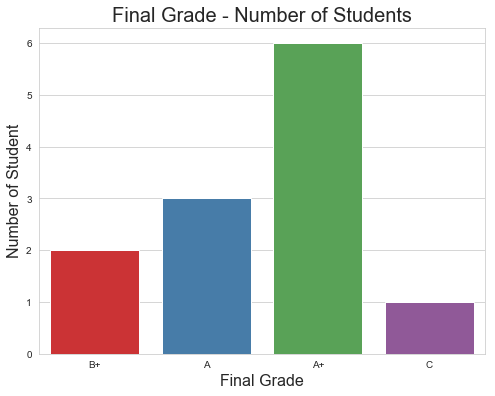

In [20]:

# Final Grade Countplot
plt.figure(figsize=(8,6))
sns.countplot(file_read.Grade, order=['B+', 'A', 'A+', 'C'], palette='Set1')
plt.title('Final Grade - Number of Students',fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Number of Student', fontsize=16)

In [21]:
# 1.) Preprocessing predictors values
copy_dataframe = file_read
# finding missing values from the dataset
# print(copy_dataframe.isna().sum())
# there are four columns where there are missing values and these are
""" 
A.) MTT_50
B.) ETT_100
C.) ETP_100
d.) Course_Att
"""   

# 1.a) preprocessing MTT_50
# Since there is no values in MTT_50 hence this column is dropped
copy_dataframe = copy_dataframe.drop(columns = ['MTT_50'])
# 1.b) preprocessing ETT_100
mean_ETT_100 = copy_dataframe['ETT_100'].mean(skipna = True)
# replacing not filled values in the column ETT_100 with the mean value
copy_dataframe['ETT_100'].fillna(mean_ETT_100, inplace = True)
# print(copy_dataframe)
# 1.c) preprocessing ETP_100
mean_ETP_100 = copy_dataframe['ETP_100'].mean(skipna = True)
# replacing not filled values in the column ETT_100 with the mean value
copy_dataframe['ETP_100'].fillna(mean_ETP_100, inplace = True)
# 1.d) preprocessing Course_Att
mean_Course_Att = copy_dataframe['Course_Att'].mean(skipna = True)
# replacing not filled values in the column Course_Att with the mean value
copy_dataframe['Course_Att'].fillna(mean_Course_Att, inplace = True)

"""
There are some columns which has string value
String value needs to be converted into integer
LabelEncoder will be used for this purpose
"""
copy_dataframe.MHRDName = le.fit_transform(copy_dataframe.MHRDName)
copy_dataframe.ScholarType = le.fit_transform(copy_dataframe.ScholarType)
copy_dataframe.Direction = le.fit_transform(copy_dataframe.Direction)
copy_dataframe.Course = le.fit_transform(copy_dataframe.Course)
copy_dataframe.Gender = le.fit_transform(copy_dataframe.Gender)
copy_dataframe.CourseType = le.fit_transform(copy_dataframe.CourseType)
copy_dataframe.ProgramType = le.fit_transform(copy_dataframe.ProgramType)
copy_dataframe.Medium = le.fit_transform(copy_dataframe.Medium)
copy_dataframe.Grade = le.fit_transform(copy_dataframe.Grade)

"""
Next step is to dplit dataset into
Predictors Variables
Target Variables
By Convention Predictors Variables are denoted by X
Target Variable by y
"""
df = copy_dataframe
"""
Termid is dropped because it has same value
So it will not be any impact on training
"""

'\nTermid is dropped because it has same value\nSo it will not be any impact on training\n'

In [22]:
X = df.drop(['Grade','Termid'], axis=1)
y = copy_dataframe['Grade']

"""
Both X and y is in form of dataframe
Conversion of df into numpy array
"""
X = X.values
y = y.values
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3)
"""
training data: This is the data with which machine will get trained
testing data: This is the data with which prediction will be done
y_training: Training targets/labels which are grade in this case
y_testing: Testing labels
"""
print("Shape of training data:", X_train.shape)
print("Shape of training data:", X_test.shape)
print("Shape of training data:", y_train.shape)
print("Shape of training data:", y_test.shape)

# Training and Calculating Score using Decision Tree
tree = DecisionTreeClassifier()
t= tree.fit(X_train, y_train)
ts=t.score(X_test, y_test)
print("Accuracy of Decision tree is {}".format(ts))
# Training and Calculating Score using Random Forest Classifier
forest = RandomForestClassifier()
f = forest.fit(X_train, y_train)
fs = f.score(X_test, y_test)
print("Accuracy of Random Forest is {}".format(fs))
# Training and Calculating Score using Random Forest Classifier
svc = SVC()
s= svc.fit(X_train, y_train)
print("SVC Model Score" , ":" , s.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , s.score(X_test, y_test))

Shape of training data: (8, 19)
Shape of training data: (4, 19)
Shape of training data: (8,)
Shape of training data: (4,)
Accuracy of Decision tree is 0.75
Accuracy of Random Forest is 0.5
SVC Model Score : 1.0 , Cross Validation Score : 0.5


## Creating the confusion matric for best model i.e SVC

In [26]:
y_pred_svc = s.predict(X_test)

In [27]:
y_pred_svc

array([1, 0, 1, 0], dtype=int64)

In [28]:
print(metrics.confusion_matrix(y_test, y_pred_svc, labels=[0, 1, 2, 3]))


[[0 0 0 0]
 [1 2 0 0]
 [1 0 0 0]
 [0 0 0 0]]


In [29]:
print(metrics.classification_report(y_test, y_pred_svc, labels=[0, 1, 2, 3]))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       1.00      0.67      0.80         3
          2       0.00      0.00      0.00         1
          3       0.00      0.00      0.00         0

avg / total       0.75      0.50      0.60         4



c:\python 3.5\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python 3.5\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
